# AirBnB Booking Analysis

### Importing the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and viewing the data

In [2]:
df = pd.read_csv('Airbnb NYC 2019.csv')

### Overview of the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Displaying the null value details

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<ul><li>reviews_per_month has missing values. Hence can be replaced with 0</li>
    </ul>

### Overview of the data

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


price has a minimum value of 0, which is not practical. Hence can be replaced with the mean value
   

### Data Cleaning

Droping unnecessary columns

In [6]:
df.drop(['id','name','host_name','last_review',], axis = 1, inplace = True)

Replacing the missing values in reviews_per_month with the mean

In [7]:
df['reviews_per_month'].fillna(0, inplace = True)

In [8]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

replacing the minimum and maximum value in price with the mean value

In [9]:
df['price'].replace({0 : df['price'].mean()}, inplace = True)

In [10]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.755045,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.143242,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Analysis

## Neighbourhood vs Price

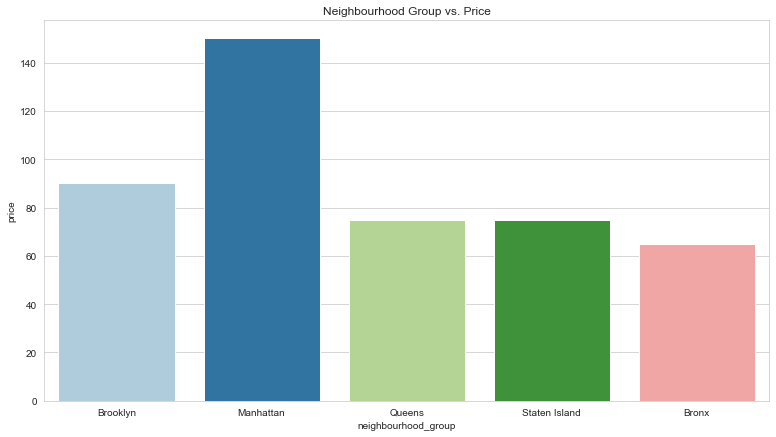

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Price")
sns.barplot(data=df, x='neighbourhood_group', y='price', palette="Paired", ci = None, estimator = np.median)
plt.show()

### Insight 1 : Airbnb listings in Manhattan are the most expensive

## Neighbourhood vs Popularity

note : We can consider reviews_per_month as an indicator of the popularity of the AirBnB 

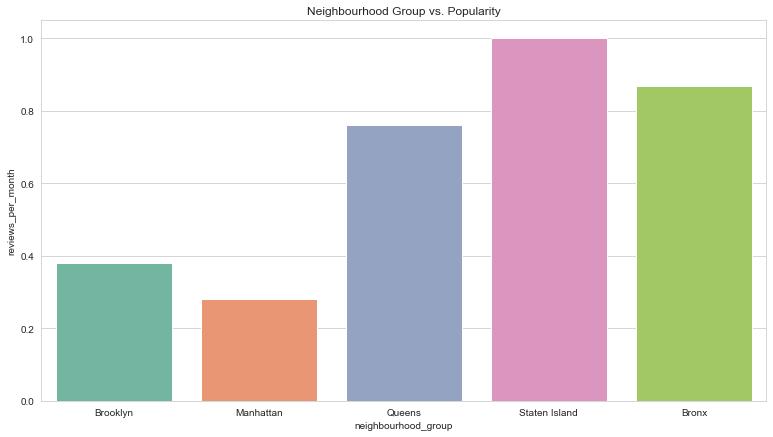

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Popularity")
sns.barplot(data=df, x='neighbourhood_group', y='reviews_per_month', palette="Set2", ci = None, estimator = np.median)
plt.show()

### Insight 2 : Airbnb listings in Staten Island are the most popular

## Room type vs Price

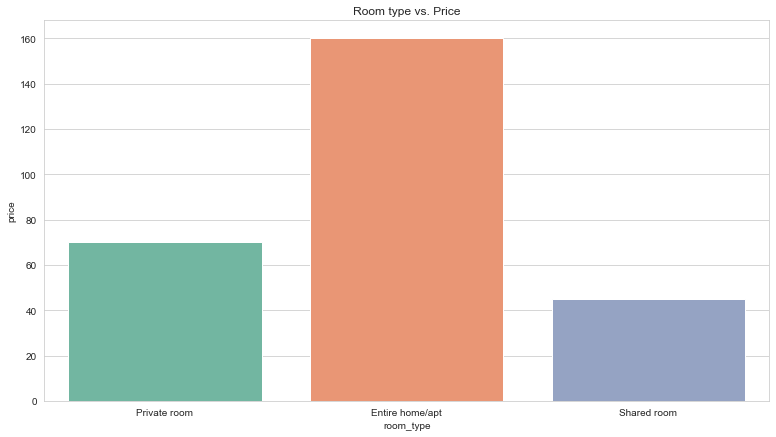

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.title("Room type vs. Price")
sns.barplot(data=df, x='room_type', y='price', palette="Set2", ci = None, estimator = np.median)
plt.show()

### Insight 4 : Entire home/apt are the most expensive among room types